# Análise de Componentes Principais (PCA): Eixos Ortogonais em 3D

Para aprofundarmos a compreensão visual sobre o PCA, vamos expandir nossa análise tridimensional utilizando as variáveis **Metragem** (`GrLivArea`), **Quartos** (`TotRmsAbvGrd`) e **Vagas de Garagem** (`GarageCars`).

Nossa nuvem de dados forma uma estrutura alongada no espaço, semelhante a um "charuto". O algoritmo do PCA busca eixos **ortogonais** (em um ângulo de 90 graus uns dos outros) para descrever essa variação. 

No gráfico abaixo, destacamos dois eixos:
1. O **1º Componente Principal ($PC_1$)**: Descreve o comprimento do "charuto" (a direção de espalhamento máximo).
2. O **2º Componente Principal ($PC_2$)**: Descreve a sua largura, capturando a segunda maior fonte de variação dos dados.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia e Tamanhos Otimizados para PDF
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Aplicação do Tema Base
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Garantia de renderização de fontes e glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

## Carregamento, Filtragem e Padronização

Novamente, aplicamos o `StandardScaler` para garantir que as diferenças de escala entre metragem (que passa dos milhares) e vagas de garagem (que são unidades pequenas) não distorçam a captura de variância geométrica feita pelo PCA.

In [32]:
# Bloco Obrigatório de Tratamento de Leitura
caminho_dados = os.path.join('..', 'data', 'ames_housing', 'train.csv')

try:
    df = pd.read_csv(caminho_dados)
    
    # Selecionando as três colunas alvo
    df_pca = df[['GrLivArea', 'TotRmsAbvGrd', 'GarageCars']].dropna()
    
    # Padronização dos dados (Média 0, Desvio Padrão 1)
    scaler = StandardScaler()
    dados_padronizados = scaler.fit_transform(df_pca)
    
    # Aplicação do PCA para extrair todos os eixos
    pca = PCA(n_components=3)
    dados_transformados = pca.fit_transform(dados_padronizados)

except FileNotFoundError:
    print("Dataset não encontrado! Por favor, baixe o arquivo 'train.csv' do Ames Housing Dataset (Kaggle) e coloque-o na pasta '../data/ames_housing/'.")
    raise SystemExit

## Visualização: Nuvem 3D Tradicional e a Projeção Plana

Abaixo geramos nossa visualização dupla:
- **(a)** A nuvem 3D em formato tradicional. As linhas vermelhas representam o $PC_1$ (cortando a maior variação) e o $PC_2$ (ortogonal, medindo o "espraiamento" lateral).
- **(b)** A projeção bidimensional com base nestes dois novos eixos. Essa é a visão planificada que o PCA constrói a partir dos dados espaciais.

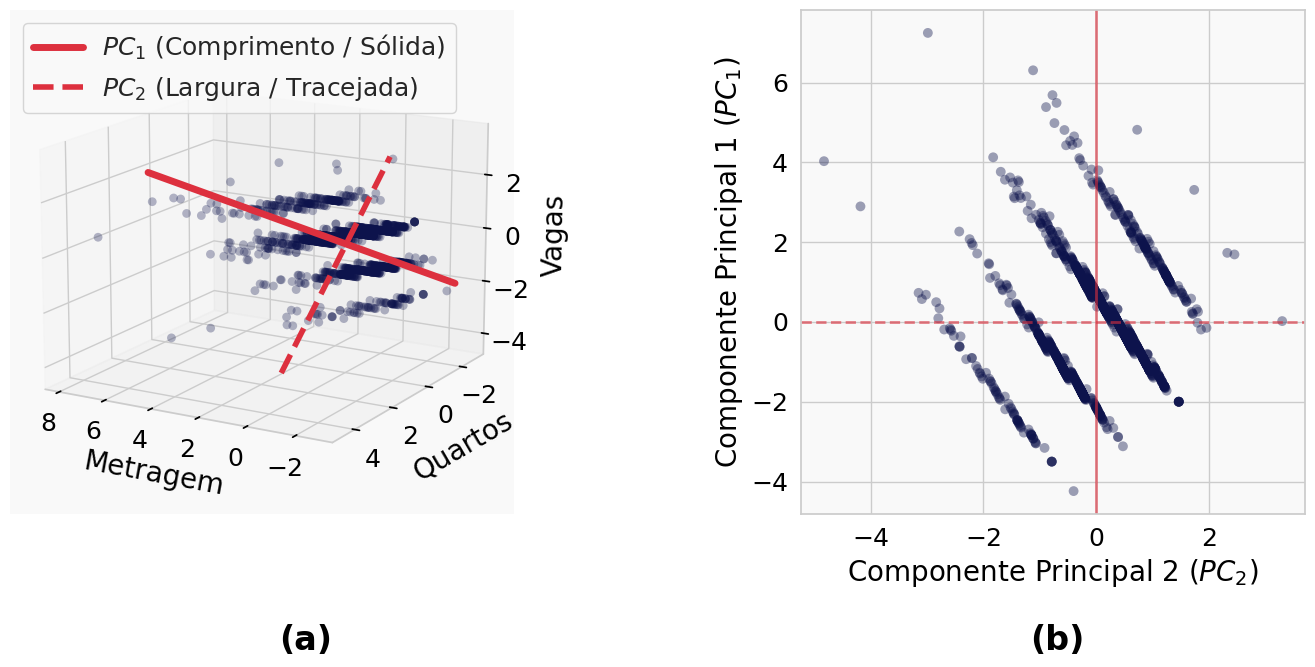

In [33]:
# Inicializando a figura
fig = plt.figure(figsize=(16, 8))

# ---------------------------------------------------------
# Plot (a): Nuvem 3D Tradicional
# ---------------------------------------------------------
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.set_facecolor(FUNDO_EIXOS)

# AJUSTE DA CÂMERA
ax1.view_init(elev=15, azim=120) 

# Plotagem com as colunas na ordem original (Metragem=X, Quartos=Y, Vagas=Z)
ax1.scatter(dados_padronizados[:, 0], dados_padronizados[:, 1], dados_padronizados[:, 2],
            alpha=0.3, color=COR_AZUL_PRINCIPAL, edgecolor='none', s=40)

# Encontrando os limites reais da nuvem projetada para desenhar os vetores do PC1 e PC2
proj1_min, proj1_max = np.min(dados_transformados[:, 0]), np.max(dados_transformados[:, 0])
proj2_min, proj2_max = np.min(dados_transformados[:, 1]), np.max(dados_transformados[:, 1])

v1 = pca.components_[0]
linha_pc1 = np.vstack([pca.mean_ + proj1_min * v1, pca.mean_ + proj1_max * v1])

v2 = pca.components_[1]
linha_pc2 = np.vstack([pca.mean_ + proj2_min * v2, pca.mean_ + proj2_max * v2])

# Plotando os eixos principais em vermelho
ax1.plot(linha_pc1[:, 0], linha_pc1[:, 1], linha_pc1[:, 2], 
         color=COR_VERMELHO, linewidth=5, label=r'$PC_1$ (Comprimento / Sólida)')

ax1.plot(linha_pc2[:, 0], linha_pc2[:, 1], linha_pc2[:, 2], 
         color=COR_VERMELHO, linewidth=4, linestyle='--', label=r'$PC_2$ (Largura / Tracejada)')

# Formatação Eixos 3D
ax1.set_xlabel('Metragem', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=12)
ax1.set_ylabel('Quartos', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=12)
ax1.set_zlabel('Vagas', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=10) 
ax1.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)
ax1.legend(fontsize=FONT_TICK, loc='upper left')


# ---------------------------------------------------------
# Plot (b): Projeção 2D (PC2 no eixo X e PC1 no eixo Y)
# ---------------------------------------------------------
ax2 = fig.add_subplot(1, 2, 2)

# Passamos a coluna 1 (PC2) para X e a coluna 0 (PC1) para Y
ax2.scatter(dados_transformados[:, 1], dados_transformados[:, 0], 
            alpha=0.4, color=COR_AZUL_PRINCIPAL, edgecolor='none', s=50)

# O Eixo X agora é o PC2. Como PC2 é a "Largura" (Tracejada no 3D), 
# a linha horizontal em Y=0 que o representa deve ser tracejada (--).
ax2.axhline(0, color=COR_VERMELHO, linestyle='--', linewidth=2, alpha=0.6)

# O Eixo Y agora é o PC1. Como PC1 é o "Comprimento" (Sólida no 3D),
# a linha vertical em X=0 que o representa deve ser sólida (-).
ax2.axvline(0, color=COR_VERMELHO, linestyle='-', linewidth=2, alpha=0.6)

ax2.set_xlabel(r'Componente Principal 2 ($PC_2$)', fontsize=FONT_LABEL, color=COR_PRETO)
ax2.set_ylabel(r'Componente Principal 1 ($PC_1$)', fontsize=FONT_LABEL, color=COR_PRETO)
ax2.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)
ax2.set_box_aspect(1) 


# ---------------------------------------------------------
# Letras (a) e (b) perfeitamente alinhadas
# ---------------------------------------------------------
fig.text(0.28, 0.08, '(a)', fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
fig.text(0.75, 0.08, '(b)', fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')


# ---------------------------------------------------------
# Ajustes Finais e Exportação
# ---------------------------------------------------------
plt.tight_layout(w_pad=4.0)
fig.subplots_adjust(left=0.05, right=0.95, top=0.88, bottom=0.25) 

caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_05')
os.makedirs(caminho_save, exist_ok=True)

plt.savefig(os.path.join(caminho_save, '03_efeito_pca_3d.png'), 
            dpi=300, bbox_inches='tight', pad_inches=0.4)

plt.show()